In [1]:
# Lab 19

In [2]:
import pandas as pd

zoo_data = pd.read_csv(r"C:\Users\jai\Desktop\zoo_data-1.csv", encoding = 'utf-8',index_col = ["animal_name"])

# print first 5 rows of zoo data
print(zoo_data.head())


             hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
animal_name                                                                     
aardvark        1         0     0     1         0        0         1        1   
antelope        1         0     0     1         0        0         0        1   
bass            0         0     1     0         0        1         1        1   
bear            1         0     0     1         0        0         1        1   
boar            1         0     0     1         0        0         1        1   

             backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
animal_name                                                                     
aardvark            1         1         0     0     4     0         0        1  
antelope            1         1         0     0     4     1         0        1  
bass                1         0         0     1     0     1         0        0  
bear                1      

In [3]:
from sklearn.cluster import KMeans
clusters = 7

kmeans = KMeans(n_clusters = clusters)
kmeans.fit(zoo_data)

print(kmeans.labels_)


C:\Users\jai\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[2 2 1 2 2 2 2 1 1 2 2 3 1 1 0 6 3 2 1 1 3 3 2 3 6 0 0 5 2 5 6 2 5 3 1 2 2
 3 1 6 6 3 6 3 2 2 6 2 2 2 2 6 0 4 2 2 3 3 3 3 1 1 1 2 2 2 1 2 2 2 2 3 4 1
 1 5 1 1 3 3 1 1 1 3 5 0 1 3 6 0 0 0 1 5 2 3 5 6 2 1 3]


In [4]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(zoo_data)

pca_data = pd.DataFrame(pca.transform(zoo_data))

print(pca_data.head())


          0         1         2
0  1.351029 -1.058533  0.314103
1  1.306634 -1.208344 -0.289405
2 -3.131655  0.252200  0.929419
3  1.351029 -1.058533  0.314103
4  1.277296 -1.225750  0.126239


In [5]:
from matplotlib import colors as mcolors
import math

''' Generating different colors in ascending order
								of their hsv values '''
colors = list(zip(*sorted((
					tuple(mcolors.rgb_to_hsv(
						mcolors.to_rgba(color)[:3])), name)
					for name, color in dict(
							mcolors.BASE_COLORS, **mcolors.CSS4_COLORS
													).items())))[1]


# number of steps to taken generate n(clusters) colors
skips = math.floor(len(colors[5 : -5])/clusters)
cluster_colors = colors[5 : -5 : skips]


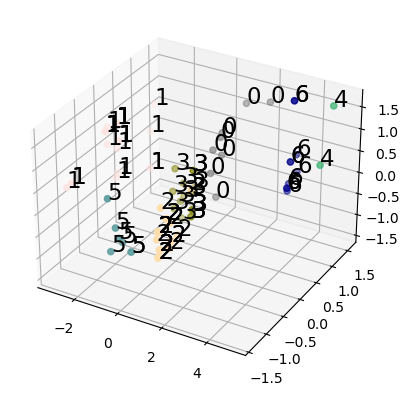

In [6]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(pca_data[0], pca_data[1], pca_data[2],
		c = list(map(lambda label : cluster_colors[label],
											kmeans.labels_)))

str_labels = list(map(lambda label:'% s' % label, kmeans.labels_))

list(map(lambda data1, data2, data3, str_label:
		ax.text(data1, data2, data3, s = str_label, size = 16.5,
		zorder = 20, color = 'k'), pca_data[0], pca_data[1],
		pca_data[2], str_labels))

plt.show()


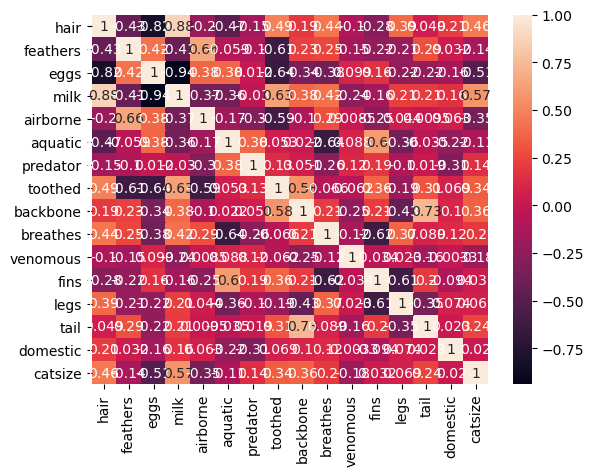

In [7]:
import seaborn as sns

# generating correlation heatmap
sns.heatmap(zoo_data.corr(), annot = True)

# posting correlation heatmap to output console
plt.show()


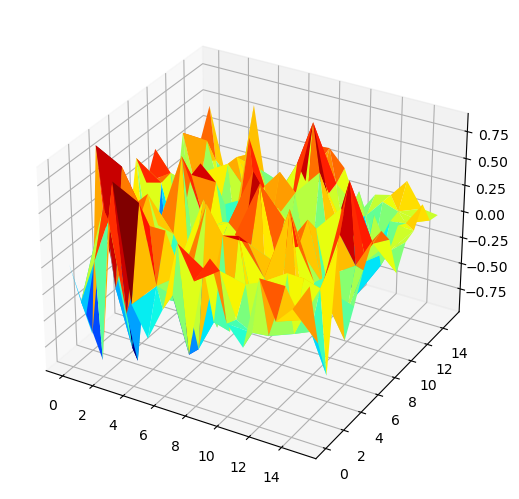

In [8]:
from matplotlib import cm

# generating correlation data
df = zoo_data.corr()
df.index = range(0, len(df))
df.rename(columns = dict(zip(df.columns, df.index)), inplace = True)
df = df.astype(object)

''' Generating coordinates with
corresponding correlation values '''
for i in range(0, len(df)):
	for j in range(0, len(df)):
		if i != j:
			df.iloc[i, j] = (i, j, df.iloc[i, j])
		else :
			df.iloc[i, j] = (i, j, 0)

df_list = []

# flattening dataframe values
for sub_list in df.values:
	df_list.extend(sub_list)

# converting list of tuples into trivariate dataframe
plot_df = pd.DataFrame(df_list)

fig = plt.figure()
ax = Axes3D(fig)

# plotting 3D trisurface plot
ax.plot_trisurf(plot_df[0], plot_df[1], plot_df[2],
					cmap = cm.jet, linewidth = 0.2)

plt.show()
